<a href="https://colab.research.google.com/github/Mberi58/Ann_Mberi/blob/main/Autolib_Cars_IP_Core_Ann_Mberi_Week4_2021_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Objective 

To analyse the mean of BlueCars and Utilib Cars taken in the weekend. 

## Metric of Success

Identifying the features that would accurantly be used in i\predicting the mean of both cars in the weekend

##Importing the Libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

##Loading Data

In [ ]:
# We load the data 
# Let Autolib data be data therefore 
# data = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
data = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
data
print(data)

       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]


##Data Cleaning

In [ ]:
# Inspecting the data 
print(data.describe())
print(" ")
print("...............................................................")
# We check the number of records in our dataset
print('This dataset has {}'.format(data.shape[0]), 'rows and {}'.format(data.shape[1]),'columns')
print(" ")
print("................................................................")
# We print the information on the dataset
print(data.info())

        Postal code  n_daily_data_points  ...  Slots_freed_sum  Slots_taken_sum
count  16085.000000         16085.000000  ...     16085.000000     16085.000000
mean   88791.293876          1431.330619  ...        22.629033        22.629282
std     7647.342000            33.212050  ...        52.120263        52.146030
min    75001.000000          1174.000000  ...         0.000000         0.000000
25%    91330.000000          1439.000000  ...         0.000000         0.000000
50%    92340.000000          1440.000000  ...         0.000000         0.000000
75%    93400.000000          1440.000000  ...         5.000000         5.000000
max    95880.000000          1440.000000  ...       360.000000       359.000000

[8 rows x 11 columns]
 
...............................................................
This dataset has 16085 rows and 13 columns
 
................................................................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data 

In [ ]:
# We descibe the columns 
data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# Checking for any duplicates 
data.duplicated().any()

False

In [ ]:
# We now get the unique values of the number of daily data points 
print(data['n_daily_data_points'].unique())

[1440 1438 1439 1320 1437 1434 1398 1420 1425 1396 1429 1389 1380 1364
 1318 1377 1203 1417 1435 1174 1436 1411 1370]


In [ ]:
# We get the unique values of day of the week
data['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
# Since there is no unique value 
# We now chek for any missing values and find the the total 
data.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

Observation

With no null values we dont have to drop any columns 

##Exploratory Data Analysis (EDA)

###Tidying the Dataset

#####Box Plot

In [ ]:
# Checking for outliers
#
data.head(2)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


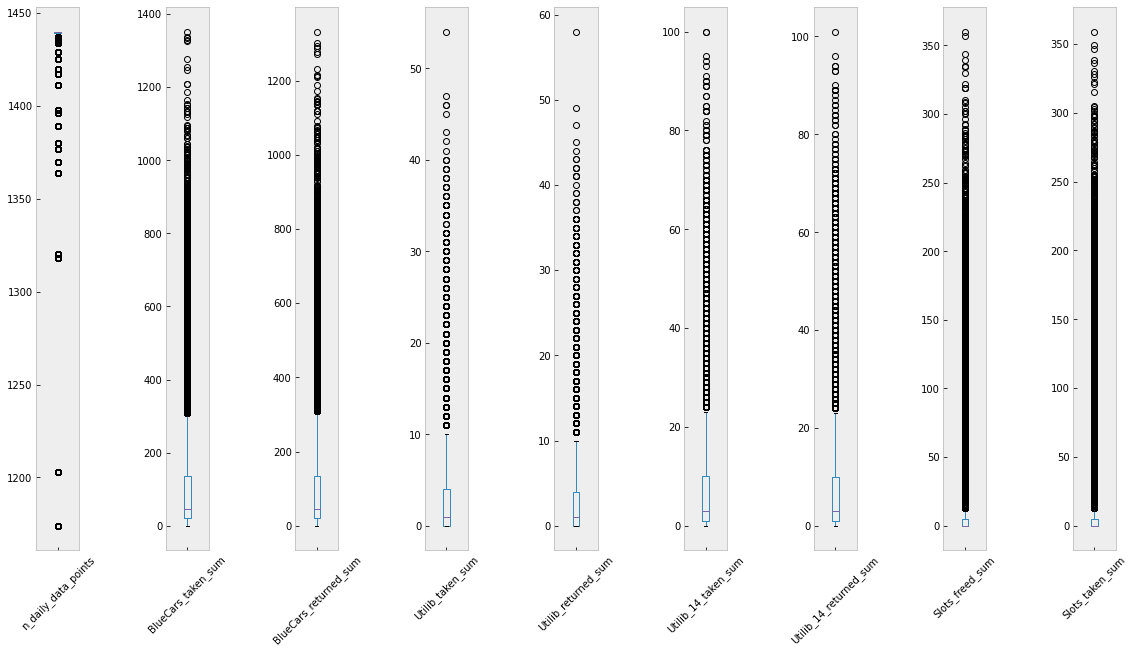

In [ ]:
# Checking for Outliers
# We define the outliers for visualisation
def outlier_visualiser(dataset_name, numeric_columns_list, width=15, height=10):

  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = width 
  fig_size[1] = height
  plt.rcParams["figure.figsize"] = fig_size
  plt.style.use('bmh')

 
  next_figure = 1
  for col in numeric_columns_list:
      plt.subplot(1, len(numeric_columns_list), next_figure)
      dataset_name.boxplot(col,rot = 45,grid=False)
      next_figure = next_figure + 1

  plt.subplots_adjust(left = 1, right=2,hspace=2, wspace=2)
  plt.show()

# we define our numeric columns list in our dataset then call the funtion for visual display
col_names = data.drop(['Postal code','date','day_type','dayOfWeek'],1)
outlier_visualiser(data, col_names.columns)

In [ ]:
# Checking for Anomalies
len(data['date'].unique())

156

In [ ]:
len(data['n_daily_data_points'].unique())

23

In [ ]:
len(data['day_type'].unique())

2

In [ ]:
data['dayOfWeek'].skew()

0.018823737645140802

In [ ]:
data['dayOfWeek'].skew()

0.018823737645140802

In [ ]:
data['BlueCars_taken_sum'].skew()

2.4063548974959086

In [ ]:
data['Utilib_taken_sum'].skew()

2.5568719194754777

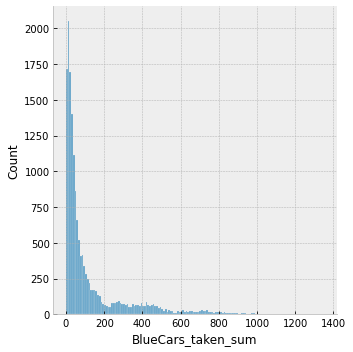

In [ ]:
import seaborn as sns
sns.displot(data['BlueCars_taken_sum'],kde=0)

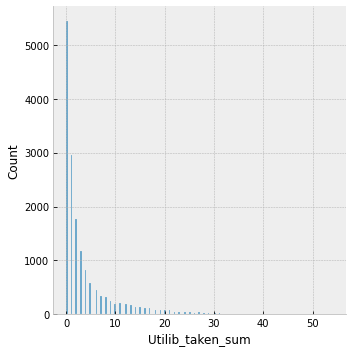

In [ ]:
sns.displot(data['Utilib_taken_sum'],kde=0)

In [ ]:
data['BlueCars_taken_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64

In [ ]:
data['Utilib_taken_sum'].quantile([0.25,0.5,0.75])

0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_taken_sum, dtype: float64

##Univariate Analysis

Overrall Univariate Analysis 

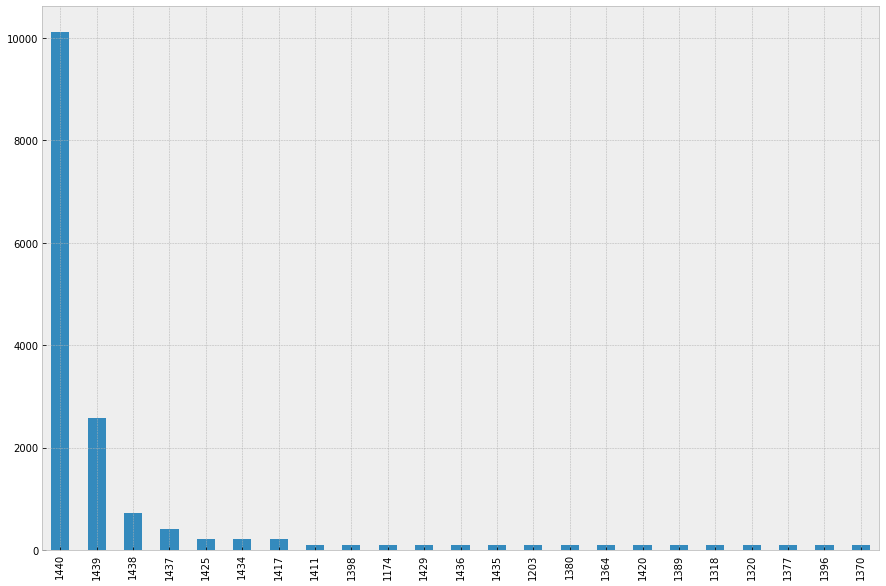

In [ ]:
data['n_daily_data_points'].value_counts().plot(kind= 'bar')

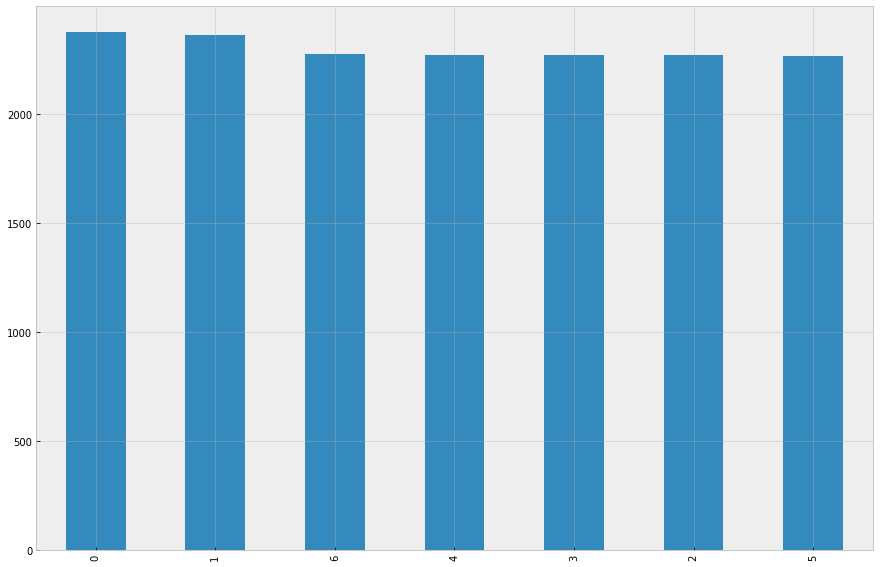

In [ ]:
data['dayOfWeek'].value_counts().plot(kind= 'bar')

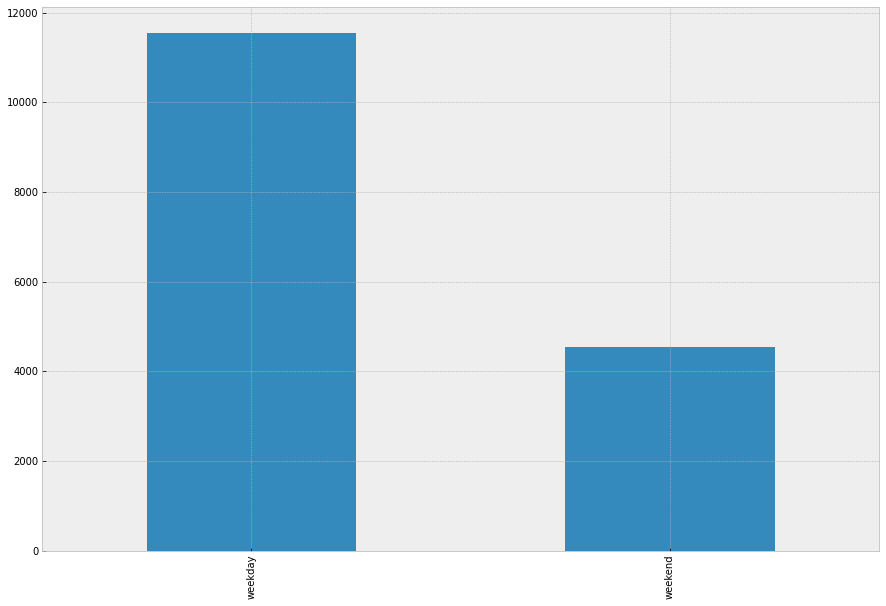

In [ ]:
data['day_type'].value_counts().plot(kind= 'bar')

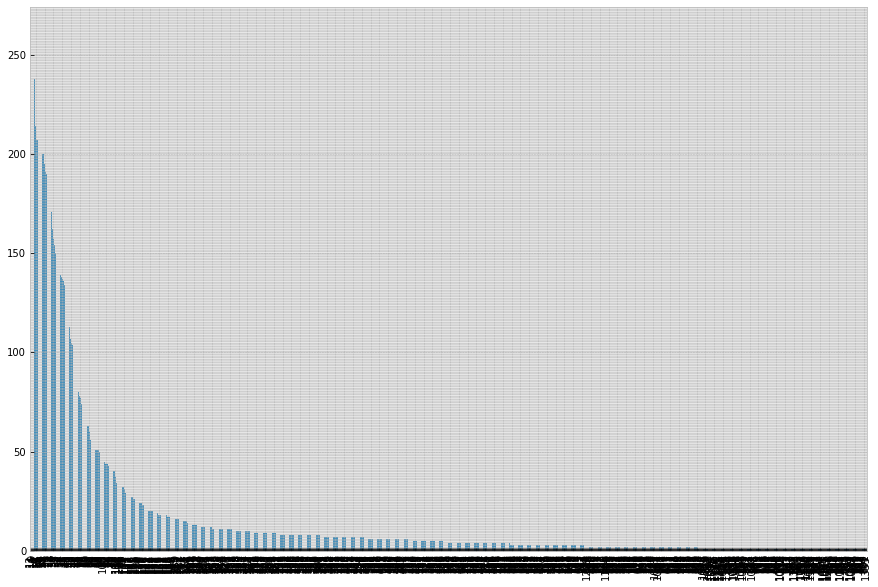

In [ ]:
data['BlueCars_taken_sum'].value_counts().plot(kind= 'bar')

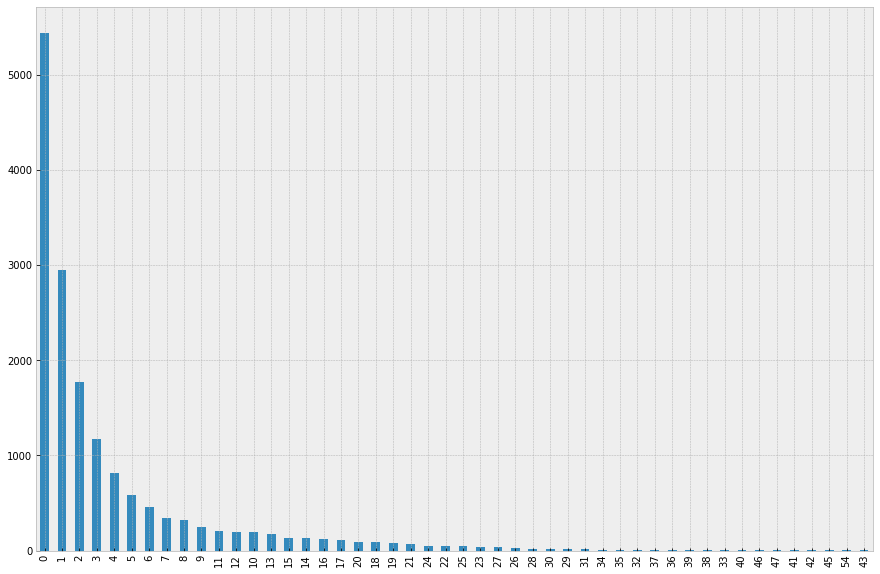

In [ ]:
data['Utilib_taken_sum'].value_counts().plot(kind= 'bar')

Categorical Variables

In [ ]:
data = pd.read_csv('http://bit.ly/DSCoreAutolibDataset') 

In [ ]:
# Check for uniques values for categorical variables
categorical = ['day_type','date']

for i in categorical:
  print(data[i].value_counts())

weekday    11544
weekend     4541
Name: day_type, dtype: int64
6/9/2018     104
5/27/2018    104
5/30/2018    104
5/20/2018    104
5/8/2018     104
            ... 
2/15/2018    102
1/23/2018    102
3/14/2018    101
2/24/2018     98
6/19/2018     94
Name: date, Length: 156, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

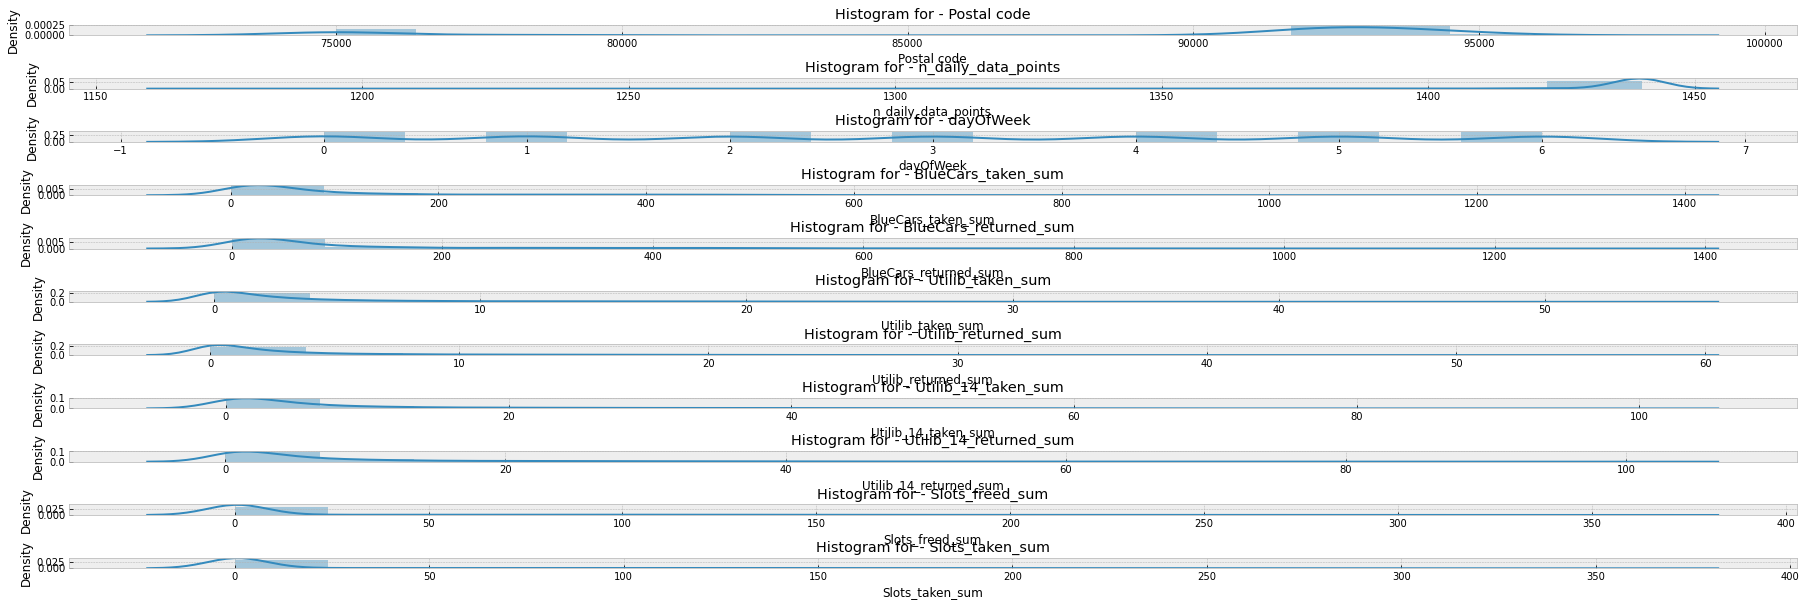

In [ ]:
numeric_columns = data.drop(['date','day_type'],1)

fig,ax = plt.subplots(len(numeric_columns.columns),figsize=(8,10))

for i,col_val in enumerate(numeric_columns.columns):
  sns.distplot(data[col_val], ax=ax[i], bins=15)
  ax[i].set_title('Histogram for - {}'.format(col_val))
  ax[i].set_xlabel(col_val)

plt.subplots_adjust(left = 1, right= 4,hspace= 4, wspace=4)

###Numerical Variables 

Measure of Central Tendency

In [ ]:
# Finding the mean for the Blue cars 
BlueCars_data = data["BlueCars_taken_sum"].mean()
BlueCars_data

125.92695057506994

In [ ]:
# Finding the Median of Blue Cars
BlueCars_data["BlueCars_taken_sum"].median()
BlueCars_data

In [ ]:
# Finding the median
BlueCars_data["BlueCars_taken_sum"].mode()

In [ ]:
# finding the mean for the Utilib Cars 
UtilibCars_data = data["Utilib_taken_sum"].mean()
UtilibCars_data

3.69829033260802

In [ ]:
# Finding the mode
UtilibCars_data["Utilib_taken_sum"].mode()

In [ ]:
# Description of the Numeric Variables
data.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


##Bivariate Analysis

Numerical and Numerical 

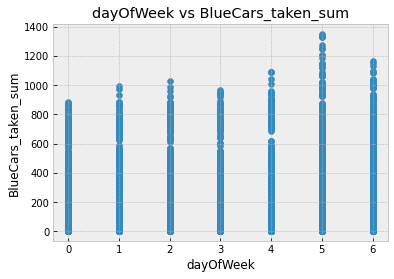

In [ ]:
# Loading our dataset from a url
data = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

# Previewing our dataset
data.head()

# Plotting our scatterplot
plt.scatter(data['dayOfWeek'], data['BlueCars_taken_sum'])

# Giving our scatterplot a title
plt.title('dayOfWeek vs BlueCars_taken_sum')

# Labelling our x axis
plt.xlabel('dayOfWeek')

# Labelling our y axis
plt.ylabel('BlueCars_taken_sum')

# Displaying our scatterplot
plt.show()

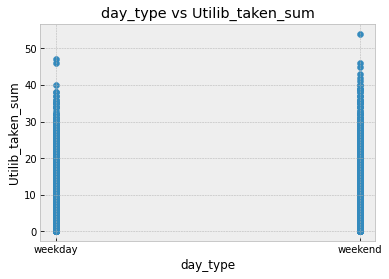

In [ ]:
# Plotting scatter plots for Utilib cars 
# Previewing our dataset
data.head()

# Plotting our scatterplot
plt.scatter(data['day_type'], data['Utilib_taken_sum'])

# Giving our scatterplot a title
plt.title('day_type vs Utilib_taken_sum')

# Labelling our x axis
plt.xlabel('day_type')

# Labelling our y axis
plt.ylabel('Utilib_taken_sum')

# Displaying our scatterplot
plt.show()

Correlation

In [ ]:
# We dertermine the relationship between the BlueCars and Utilib cars 
# by determining the correlation coefficient.
# Calculating the pearson coefficient
pearson_coeff = data["Utilib_taken_sum"].corr(data["BlueCars_taken_sum"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = data["Utilib_taken_sum"].corr(data["BlueCars_taken_sum"]) 
print(coeff)

0.8938325700709974
0.8938325700709974


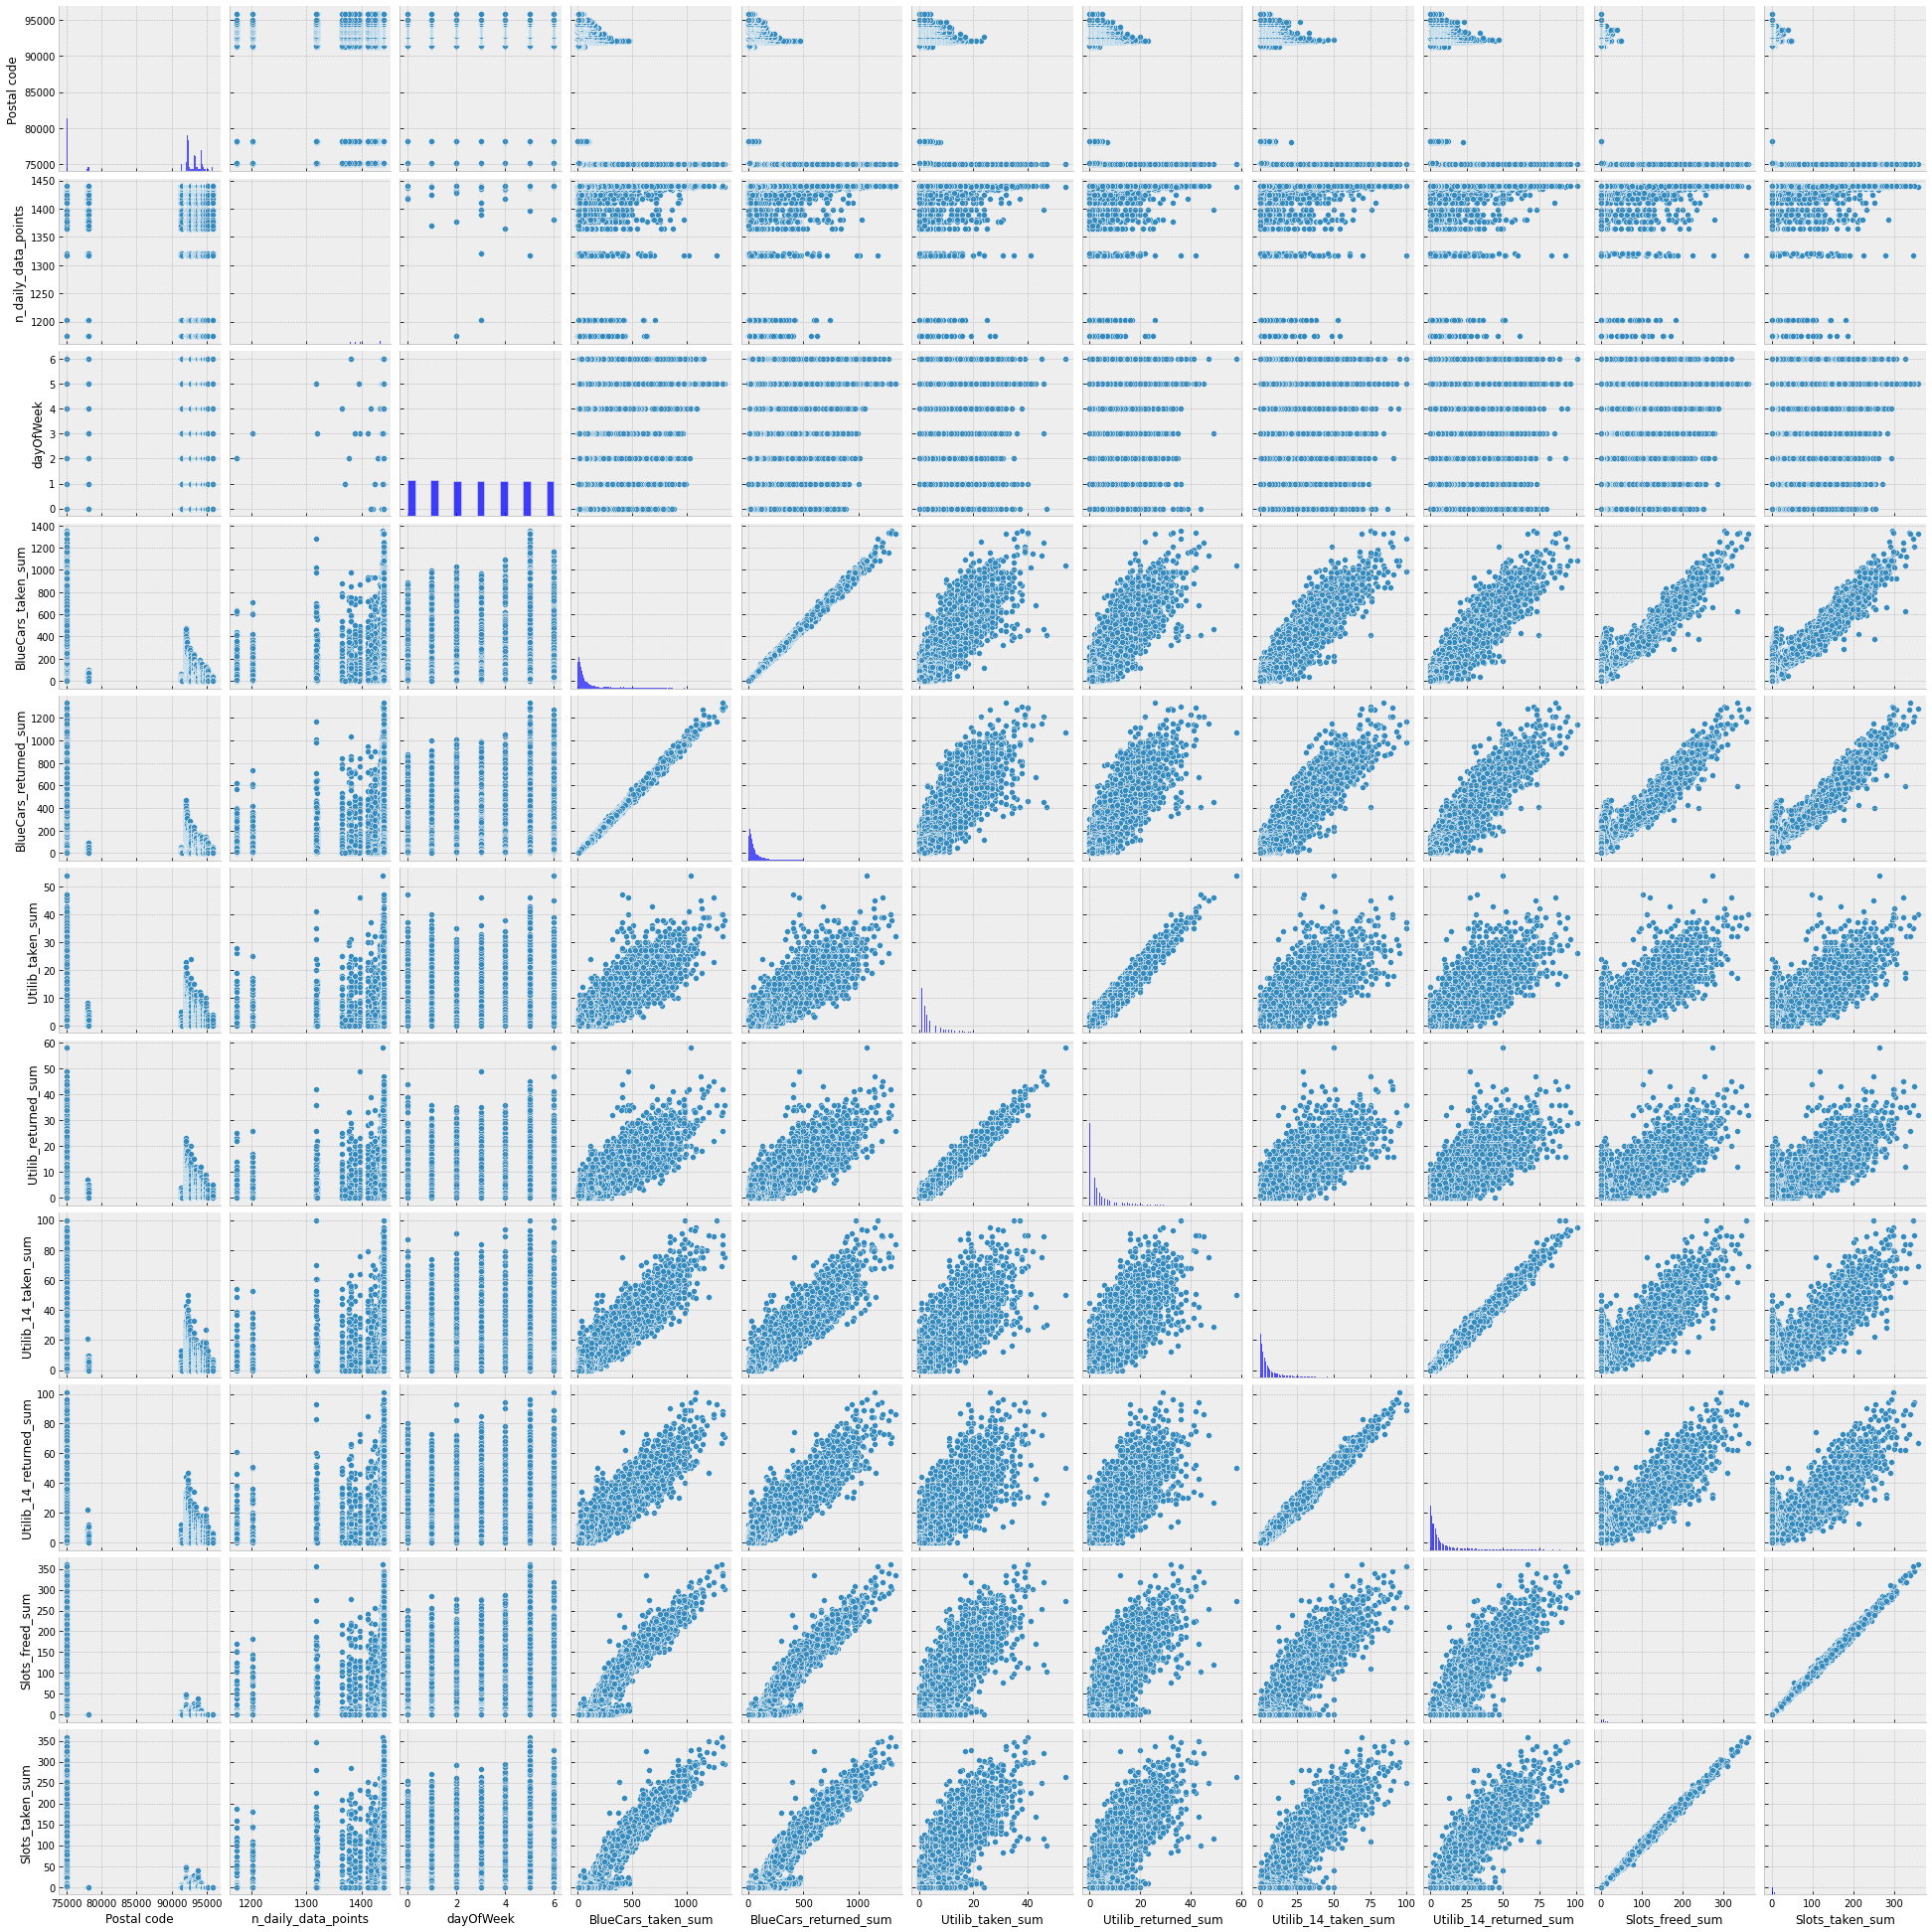

In [ ]:
# Scatter Plot
sns.pairplot(numeric_columns)

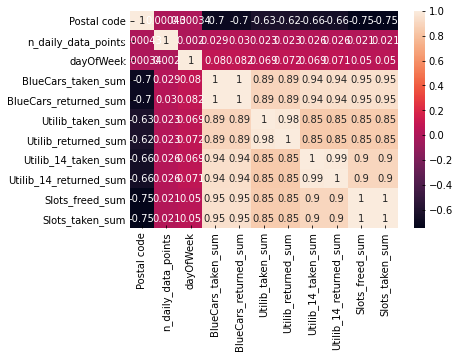

In [ ]:
# Correlation in the Numeric Variables
# Visualise the correlation matrix using a heat map
sns.heatmap(data.corr(),annot=True)

Z-test 

## Hypothesis Testing

H0 : The mean of the Blue Cars taken on weekends is equal to the mean of Utilib Car taken on weekends

Ha : The mean of the Blue Cars taken on weekends is different to the mean of the Utilib cars taken on Weekends

In [ ]:
# Loading our dataset from a url
data = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [ ]:
# For our sampling I will use systematic Random Sampling

def sys_sample(df,r,n):
  k = df.shape[0] // n
  index = [None]* n
  a = r
  index[0] = a

  for i in np.arange(1,n):
    a = a + k
    if a > df.shape[0]:
      a = a - df.shape[0]

    index[i] = a
  return(df.iloc[index])

data_sample = sys_sample(data[data['day_type'] == 'weekend'], r=5, n=100)
data_sample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
20,75001,1/21/2018,1440,6,weekend,143,150,4,4,8,8,23,25
182,75002,1/27/2018,1440,5,weekend,270,270,8,8,16,16,49,48
339,75003,1/28/2018,1440,6,weekend,327,334,13,12,19,19,95,92
501,75004,2/3/2018,1438,5,weekend,346,352,9,8,14,14,56,57
658,75005,2/4/2018,1440,6,weekend,348,358,9,10,22,21,109,107


In [ ]:
# We import a library
from scipy.stats import shapiro 

In [ ]:
# testing for normality for Bluecars Taken 
stat, p = shapiro(data_sample['BlueCars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.662, p=0.000
Sample does not look Gaussian


In [ ]:
# testing for normality for Utilib Cars Taken

stat, p = shapiro(data_sample['Utilib_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.662, p=0.000
Sample does not look Gaussian


#Observation 


If you use the Shipiro-wilk Test and we find that value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution

1) From our analysis our data is not Normally Distributed

T-test

In [ ]:
from scipy.stats import ttest_ind

ttest,pval = ttest_ind(data_sample['BlueCars_taken_sum'],data_sample['Utilib_taken_sum'])

print("This is our p-value", pval)
print("This is value of the ttest", ttest)
print(" ")
print("...................................................................")
# To determine i
if pval < 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We accept the Null Hypothesis")

This is our p-value 3.3377307819589825e-10
This is value of the ttest 6.617724042891909
 
...................................................................
We reject the Null Hypothesis


Point-Estimation

In [ ]:
# Import the neccessary libarries
import numpy as np
import pandas as pd

# scipy is python library will help us use statistical formulas in our code
import scipy.stats as stats
import random

In [ ]:
# Population Mean for BlueCars
population = data[data['day_type'] == 'weekend']
population_mean = population['BlueCars_taken_sum'].mean()
population_mean

# The sample mean
sample_mean = data_sample['BlueCars_taken_sum'].mean()
sample_mean

#point estimator
population_mean - sample_mean

-2.919931733098423

In this case we can see that based on the BlueCars taken sum sample mean of our estimator underestimates the true mean by 2.92. We can conclude that we can get a fairly accurate estimate of a large population from a fairly small subset.

In [ ]:
# Population Mean for Utilib
population_mean_utilib = population['Utilib_taken_sum'].mean()

# The sample mean
sample_mean_utilib = data_sample['Utilib_taken_sum'].mean()

#point estimator
population_mean_utilib - sample_mean_utilib

-0.13691477648095152

In this case we can see that based on the Utilib taken sum sample mean of our estimator underestimates the true mean by 0.13. We can conclude that we can get a fairly accurate estimate of a large population from a fairly small subset.

Confidence Level

In [ ]:
import numpy as np
# Confidence level for Blue Cars

#sample mean
sample_mean = len(data_sample['BlueCars_taken_sum'])
sample_mean

# Finding the sample size
sample_size = len(data_sample['BlueCars_taken_sum'])
sample_size

#standard error
std_error = data_sample['BlueCars_taken_sum'].std()/np.sqrt(sample_mean)
std_error

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between 55.75 and 144.24

(55.75007817700451, 144.24992182299547)

In [ ]:
import numpy as np
# Confidence level for Utilib Cars

#sample mean
sample_mean = len(data_sample['Utilib_taken_sum'])
sample_mean

# Finding the sample size
sample_size = len(data_sample['Utilib_taken_sum'])
sample_size

#standard error
std_error = data_sample['Utilib_taken_sum'].std()/np.sqrt(sample_mean)
std_error

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between 98.62 and 101.38

(98.62352016492092, 101.37647983507908)

##Conclusion

We reject our Null Hypothesis of the mean Blue Cars taken on the weekend is equal to Utilib Cars taken on weekends .

In our case we have a p-value of (p=3.3377307819589825e-10). A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis. Therefore we reject the Null Hypothesis